In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


def amazon_json_to_df(path_to_json):  
    with open(path_to_json) as f:
        rows = f.readlines()
    cols = json.loads(rows[0]).keys()
    data = {col: [] for col in cols}
    
    for row in rows:
        row_json = json.loads(row)
        for col in cols:
            data[col].append(row_json.get(col))
            
    df = pd.DataFrame.from_dict(data)
    
    return df


In [2]:
# https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Video_Games.csv - датасет с оценками видеоигр
df = amazon_json_to_df("Video_Games_5.json")
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600


**reviewerID** - ID of the reviewer, e.g. *A2SUAM1J3GNN3B*  
**asin** - ID of the product, e.g. *0000013714*  
**reviewerName** - name of the reviewer  
**reviewText** - text of the review  
**overall** - rating of the product  
**summary** - summary of the review  
**unixReviewTime** - time of the review (unix time)  
**reviewTime** - time of the review (raw)  

In [3]:
# Приведем значения True/False к 1/0
convert_bool = lambda x : 1 if x == True else 0
df["verified"] = df["verified"].apply(func=convert_bool)

print(df.shape)
df.head()

(497577, 9)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5.0,1,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000
1,4.0,0,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200
2,3.0,1,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600
3,2.0,1,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400
4,5.0,1,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600


In [4]:
# Посмотрим, какие значения оценки встречаются в данных
df["overall"].unique()

array([5., 4., 3., 2., 1.])

In [5]:
# Посмотрим, сколько игр было оценено
df["asin"].unique().shape

(17408,)

In [8]:
# Видно, что есть пропуски в reviewText
df.isna().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName       75
reviewText          0
summary           100
unixReviewTime      0
dtype: int64

In [9]:
# Удалим пропущенные значения и дубли, т.к. данных предостаточно
df.dropna(subset=["reviewText"], inplace=True)
df.drop_duplicates(subset=["reviewerID", "asin"], inplace=True)
df.isna().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName       75
reviewText          0
summary           100
unixReviewTime      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473270 entries, 0 to 497576
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         473270 non-null  float64
 1   verified        473270 non-null  int64  
 2   reviewTime      473270 non-null  object 
 3   reviewerID      473270 non-null  object 
 4   asin            473270 non-null  object 
 5   reviewerName    473195 non-null  object 
 6   reviewText      473270 non-null  object 
 7   summary         473170 non-null  object 
 8   unixReviewTime  473270 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 36.1+ MB


In [11]:
df.describe()

,overall,verified,unixReviewTime
count,473270.000000,473270.000000,4.732700e+05
mean,4.226103,0.673345,1.369925e+09
std,1.182693,0.468990,1.235130e+08
min,1.000000,0.000000,9.398592e+08
25%,4.000000,0.000000,1.324858e+09
50%,5.000000,1.000000,1.412640e+09
75%,5.000000,1.000000,1.453680e+09
max,5.000000,1.000000,1.538438e+09


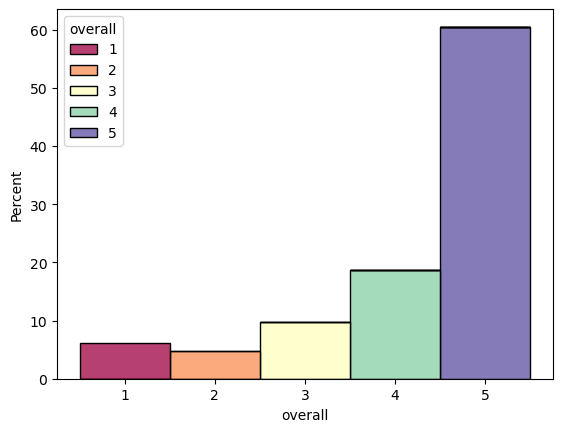

In [12]:
# Посмотрим на распределение значений оценок
df["overall"] = df["overall"].astype(int)

sns.histplot(
    data=df,
    x="overall",
    hue="overall",
    palette="Spectral",
    multiple="stack",
    stat="percent",
    discrete=True
)
plt.show()

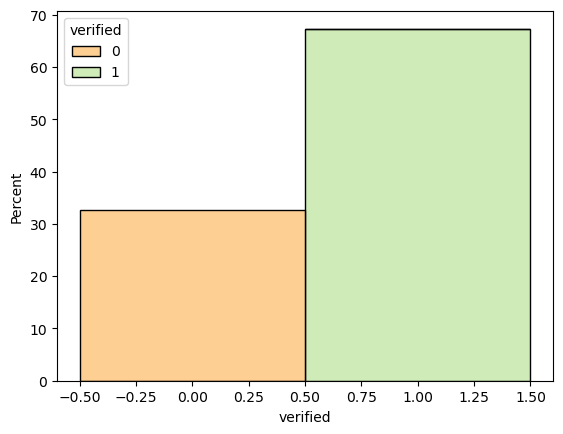

In [13]:
# Посмотрим на распределение значений признака, который показывает проверен отзыв или нет
sns.histplot(
    data=df,
    x="verified",
    hue="verified",
    palette="Spectral",
    multiple="stack",
    stat="percent",
    discrete=True
)
plt.show()

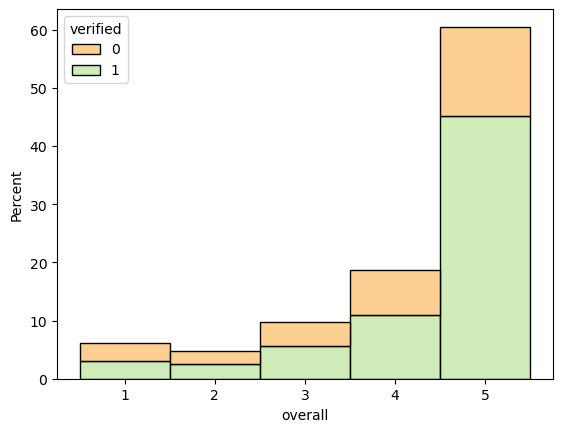

In [14]:
sns.histplot(
    data=df,
    x="overall",
    hue="verified",
    palette="Spectral",
    multiple="stack",
    stat="percent",
    discrete=True
)
plt.show()

Большинство оценок имеют наивысший балл. Большинство отзывов подтверждены, значит им можно верить. В данных нет такого, что низкие оценки имеют преимущественно неподтвержденные отзывы (значит, не преобладают искусственные отрицательные отзывы).

Построим простую модель рекомендательной системы.

In [93]:
class UserBasedRecSys:
    def __init__(self, raw_data, mapping_dict):
        self.raw_data = raw_data
        self.mapping_dict = mapping_dict
        self.score_matrix = None

    def build_score_matrix(self):
        raw_data = self.raw_data.copy()
        raw_data.rename(columns={
            self.mapping_dict["score"]: "score",
            self.mapping_dict["user"]: "user",
            self.mapping_dict["item"]: "item",
        }, inplace=True)

        self.score_matrix = pd.pivot_table(
            raw_data,
            values="score",
            index="user",
            columns="item",
            fill_value=0
        )

    def recommend(self, user, top_i=5, top_u=5, verbose=False, eval=False):
        # Проверка, что матрица оценок была построена
        if self.score_matrix is None:
            raise ValueError("Score matrix is not built. Please run build_score_matrix() first.")

        # Получение оценок пользователя user из матрицы
        user_ratings = self.score_matrix.loc[user][self.score_matrix.loc[user] != 0]
        if verbose:
            print(f"User ratings: {user_ratings}\n")

        # Находим похожих пользователей на основе косинусного сходства
        similar_users = self.score_matrix.apply(lambda row: np.nan if row.equals(user_ratings) else np.nanmax(np.abs(row.corr(user_ratings))), axis=1)

        # Фильтруем похожих пользователей, оставляя только тех, кто не user
        similar_users = similar_users[similar_users.index != user]

        # Проверка, что есть похожие пользователи
        if similar_users.empty:
            return []

        # Получаем топ N похожих пользователей
        top_similar_users = similar_users.nlargest(top_u)
        if verbose:
            print(f"Top similar users: {[user for user in top_similar_users.index]}\n")

        # Ищем варианты, которые выбирали похожие пользователи
        selected_items = set(self.score_matrix.columns)
        for similar_user in top_similar_users.index:
            selected_items.difference_update(self.score_matrix.loc[similar_user][self.score_matrix.loc[similar_user] != 0].index)

        # Если модель не в режиме оценки, то из выбранных вариантов удаляются те, что уже выбирал user ранее
        # Иначе эти товары остаются, т.к. во время оценки модели ожидается, что она предложит те варианты, что user уже выбирал 
        if not eval:
            selected_items.difference_update(user_ratings.index)
        if verbose:
            print(f"Items that are selected by similar users: {[item for item in selected_items]}\n")

        # Составляем рекомендации на основе выбранных вариантов похожими пользователями
        recommendations = pd.Series(index=selected_items, dtype=float)
        for item in selected_items:
            item_ratings = self.score_matrix[item]
            item_ratings = item_ratings[top_similar_users.index]
            weighted_rating = item_ratings.mean()
            recommendations[item] = weighted_rating

        # Сортируем рекомендации по убыванию весовых оценок
        recommendations = recommendations.sort_values(ascending=False)

        # Получаем top_i рекомендаций
        top_recommendations = recommendations.head(top_i)

        return top_recommendations.index.tolist()

    def evaluate_recommendations(self, test_data, top_i=3):
        if self.score_matrix is None:
            raise ValueError("Score matrix is not built. Please run build_score_matrix() first.")

        # Группировка тестовых данных по пользователям для удобства оценки
        grouped_test_data = test_data.groupby('user')['item'].agg(list).reset_index()

        # Инициализация переменных для метрик
        precision_list = []
        recall_list = []
        f1_score_list = []

        for index, row in grouped_test_data.iterrows():
            user = row['user']
            actual_items = set(row['item'])

            # Получение рекомендаций для пользователя
            # Выставляю top_i=100, потому что в отсортированных по убыванию рекомендациях очень много объектов
            #    с одинаковым рейтингом, поэтому когда берется топ K значений, истинный выбор пользователя отфильтровывается
            #    просто потому что он находится ниже в списке, хотя имеет такой же высокий рейтинг.
            recommended_items = set(self.recommend(user, top_i=100, verbose=False, eval=True))

            # Определение пересечения рекомендаций и фактических оценок
            true_positives = recommended_items.intersection(actual_items)

            # Рассчет Precision
            precision = len(true_positives) / top_i if top_i > 0 else 0
            precision_list.append(precision)

            # Рассчет Recall
            recall = len(true_positives) / len(actual_items) if len(actual_items) > 0 else 0
            recall_list.append(recall)

            # Рассчет F1 Score
            if precision + recall > 0:
                f1_score = 2 * (precision * recall) / (precision + recall)
                f1_score_list.append(f1_score)
            else:
                f1_score_list.append(0)

        # Средние значения метрик по всем пользователям
        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)
        avg_f1_score = np.mean(f1_score_list)

        return avg_precision, avg_recall, avg_f1_score


In [94]:
mapping_dict = {
    "user": "reviewerID",
    "item": "asin",
    "score": "overall",
}

crop_data = df[:5000]
recsys = UserBasedRecSys(crop_data, mapping_dict)

In [95]:
recsys.build_score_matrix()
recsys.score_matrix

item,0700026398,0700026657,0700099867,0804161380,3828770193,6050036071,7293000936,7544256944,8176503290,8565000168,...,B00001P4QN,B00001P4Y6,B00001P4Y9,B00001QECO,B00001QED2,B00001QED5,B00001QEEC,B00001QEQ8,B00001QEQ9,B00001QES0
user,,,,,,,,,,,,,,,,,,,,,
A100NE7N89DVC0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100O5QLORBZRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A102KAIWB6NU7A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A104LH4WL8AAJR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1055QXUA6BOEL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZW4K59K4QWZ8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZWKRO5BBSBEB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZXHK8IO25FL6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Протестируем работу модели.

In [96]:
user = "A102KAIWB6NU7A"

recommendations = recsys.recommend(user, verbose=True)
print("Recommendations for {}: {}".format(user, recommendations))

User ratings: item
907843905X    1
B00001NTSN    5
Name: A102KAIWB6NU7A, dtype: int64

Top similar users: ['A105A034ZG9EHO', 'A198KI926OU1KB', 'A1HMLIR8BCYBVF', 'A1TK6R2JSC97HL', 'A1UPWXH1L5E3G7']

Items that are selected by similar users: ['B00000K1VK', 'B000003SQQ', 'B00000K1V7', 'B00000JQ0V', 'B00000J2W7', 'B00000K2GJ', 'B00001OX4T', 'B00000JHPN', 'B00000DMAQ', 'B00000J9J9', 'B00000JHPD', 'B00000I1BV', 'B00001IVLY', '9867299434', 'B00000K11D', 'B00001QED2', 'B00000J96V', 'B000006RGR', 'B00001NFSY', 'B00000I1BE', '6050036071', 'B00000IG7T', 'B00000K2G7', 'B00000K2YD', 'B00000DMB2', 'B00000K4BX', 'B00000DMAO', 'B00000F1GM', 'B00000JL60', 'B000006OVE', 'B00000IWIW', 'B00000K4DE', 'B000006P0J', 'B00000ID61', 'B00000DMAN', 'B00000JL6V', 'B00000K4EC', 'B00000I1C3', 'B00000IMK5', 'B00000JQQM', 'B00000DMAT', '3828770193', 'B000006OVJ', 'B00000J97G', 'B00000JNHJ', 'B00000I1BA', 'B00000IJVY', 'B00000IFRI', 'B00001NFS5', 'B00000IKQH', 'B000006RGQ', 'B00000K0DJ', 'B00000K2R5', 'B000006RGO', 'B0

Проверим, насколько модель хорошо справилась.

In [97]:
# Пользователь, для которого делали предсказание
crop_data.loc[crop_data.reviewerID == "A102KAIWB6NU7A"]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
164,1,1,"01 26, 2012",A102KAIWB6NU7A,907843905X,St905,I got the ship simulator but I tried to instal...,It sucks....,1327536000
4820,5,0,"02 22, 2013",A102KAIWB6NU7A,B00001NTSN,St905,"It does work for my computer (Dell, Windows XP...",Does work!,1361491200


In [98]:
# Убедимся, что похожие пользователи похожи
crop_data.loc[crop_data.reviewerID == "A1HMLIR8BCYBVF"]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
165,2,0,"07 8, 2011",A1HMLIR8BCYBVF,907843905X,M Spocky,It looks interesting at the beginning but I wa...,Pretty boring,1310083200
4473,2,1,"02 8, 2008",A1HMLIR8BCYBVF,B00001LDCD,M Spocky,I would probably have had more fun if I hadn't...,Outdated,1202428800


In [99]:
# Посмотрим, как высоко оценили другие пользователи рекомендуемую игру
crop_data.loc[crop_data.asin == "B00000ID60"]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
2168,2,0,"03 28, 2003",A3W4D8XOGLWUN5,B00000ID60,Michael Kerner,Although there are video games out there that ...,Not Behind The Checkered Flag,1048809600
2169,4,0,"12 23, 2000",A1ERDXS0QLEVKB,B00000ID60,rzaster,Unlike some other reviewers I actually found t...,Pretty Good,977529600
2174,1,1,"01 8, 2017",ARFFDO9W8Z7L0,B00000ID60,Amazon Customer,"The game looks fine, but it doesn't work.",Broken Game,1483833600
2175,5,1,"08 2, 2016",AJKKLETPK6IJX,B00000ID60,Claude curry,Thank you for this.. This was a hit in my hous...,Great product great shipping and just great se...,1470096000
2176,4,1,"07 12, 2016",A8NLVLFDZZEK3,B00000ID60,Joshua Williams,"Game came in horrible shape, and did not work ...","Game came in horrible shape, and did not work ...",1468281600
2177,5,1,"03 10, 2016",ATRT5NTJCKM4L,B00000ID60,Amazon Customer,came fast.. works .. love it.,love it.,1457568000
2185,4,1,"02 11, 2016",A2NMICZ97JQ8QO,B00000ID60,Justin,"Good game, my gameshark reads it and it's much...",Four Stars,1455148800
2186,5,1,"12 31, 2015",A8RM202IIT8FH,B00000ID60,Alex Smith,A very fun game.,Five Stars,1451520000
2187,5,1,"12 14, 2015",A3R1U0RRZ7B775,B00000ID60,rowebster27,I bought this game for my wife as this was her...,Fun game,1450051200
2188,4,1,"10 11, 2015",A3BBBSJRYH1I0X,B00000ID60,Jonathan S,This is a gift for her N64,Gift for wife,1444521600


In [101]:
test_data = crop_data[:100][["reviewerID", "asin", "overall"]].rename(columns={
    "reviewerID": "user",
    "asin": "item",
    "overall": "score",
})

recsys.evaluate_recommendations(test_data)

(0.2833333333333333, 0.85, 0.425)